# Task a) and b) of Project 1 - FYS-STK4155

In [1]:
from functions import *

%load_ext autoreload
%autoreload 2

In [2]:
# Colormap for plotting
colormap = 'plasma'

# a) Ordinary Least Squares (OLS)
* Using OLS to predict the Runge function.
* Method is applied for the different number of data points in `n_vals` and for the different polynomial degrees in `p_vals`.
* Uses sklearn functionalities to make the model and assess the MSE and R^2 score.

In [3]:
n_vals = np.arange(50, 1050, 50)  # Range of number of data points, 50-1000
p_vals = np.arange(2, 16)  # Range of polynomial degrees, 2-15

In [4]:
df_OLS = OLS_results(n_vals, p_vals)

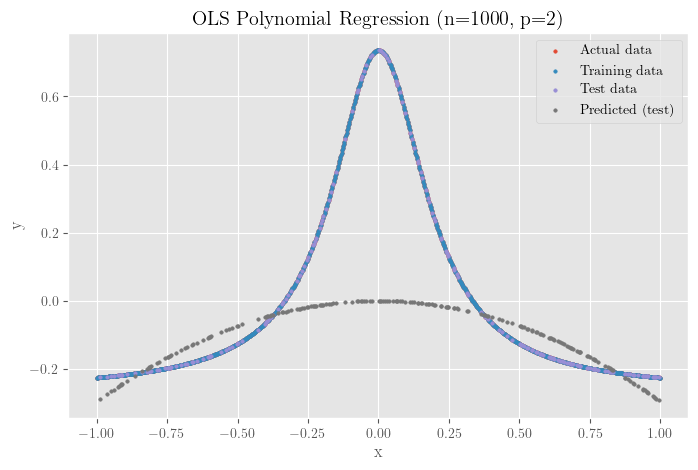

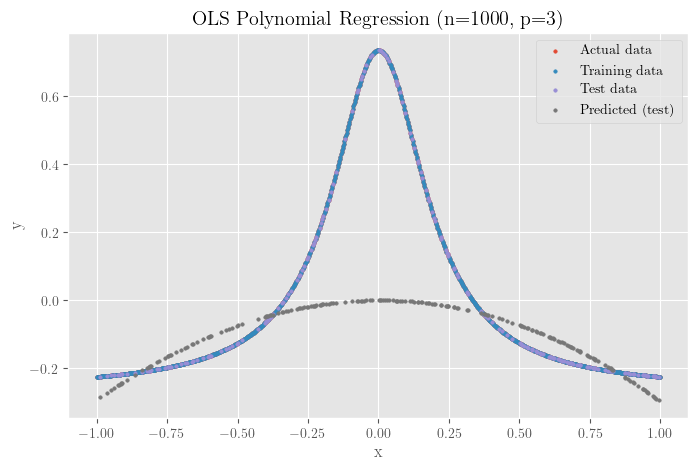

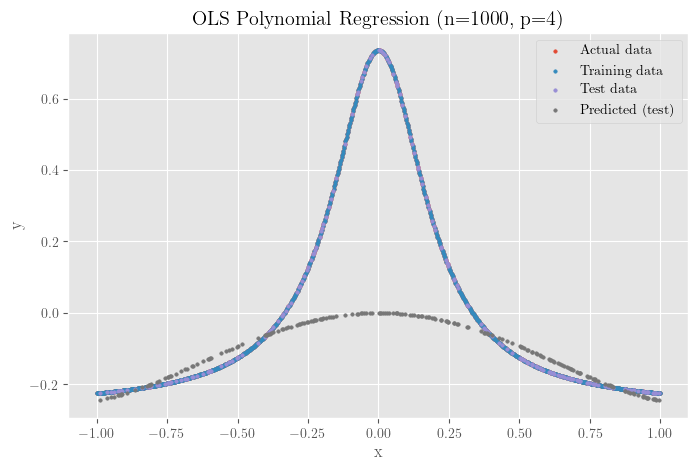

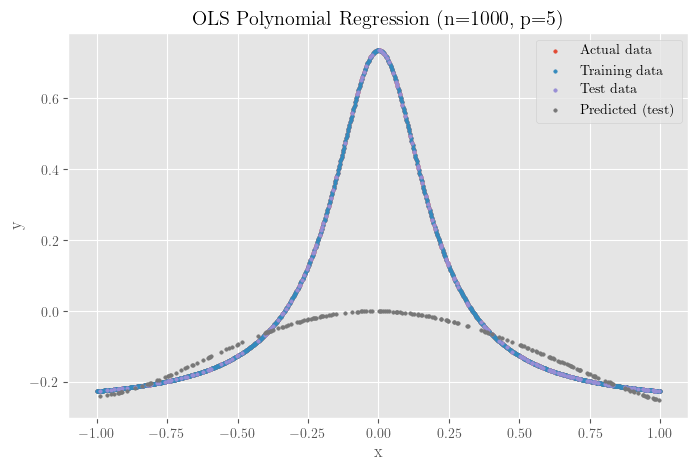

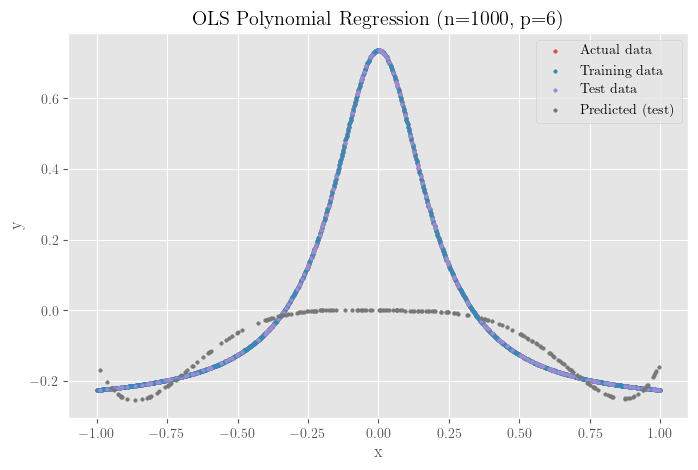

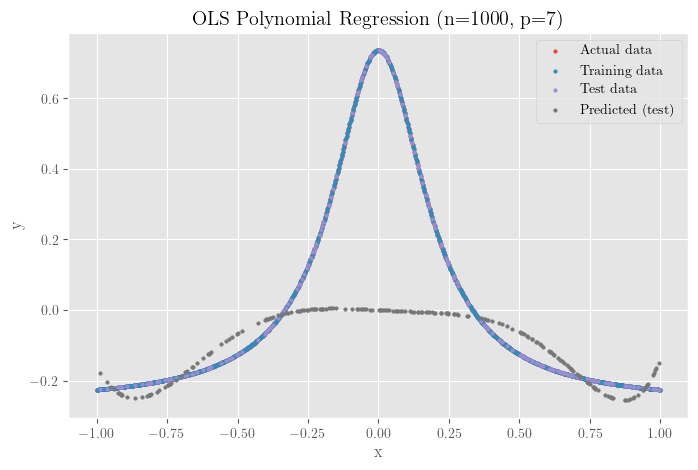

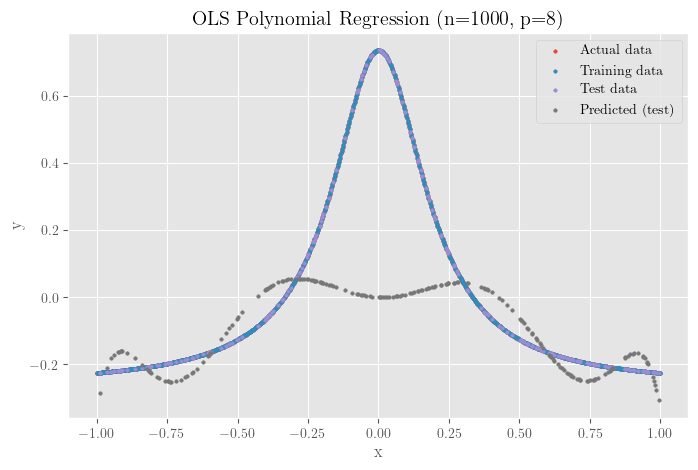

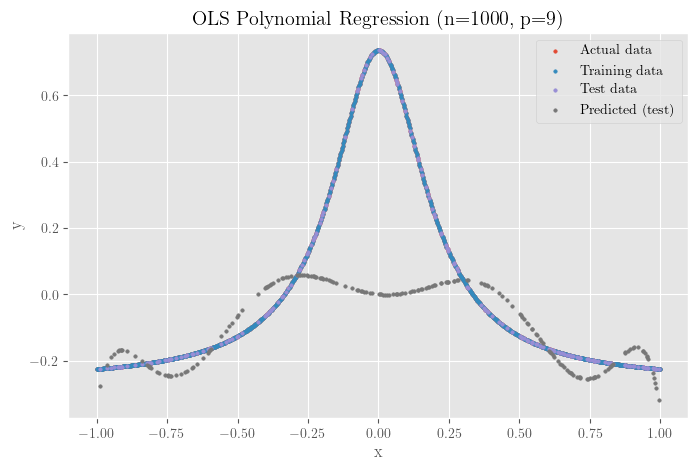

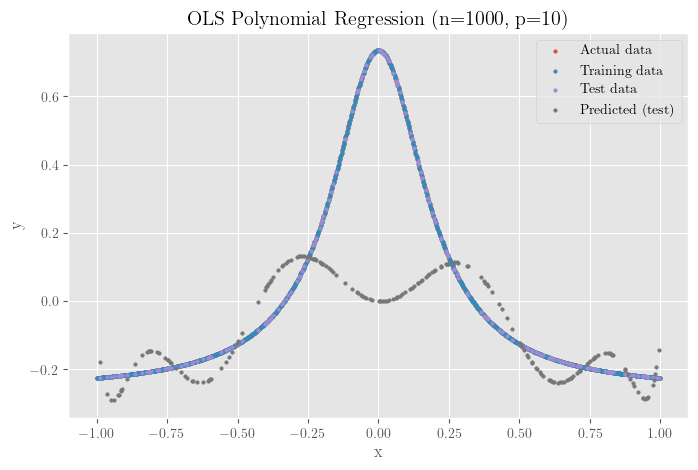

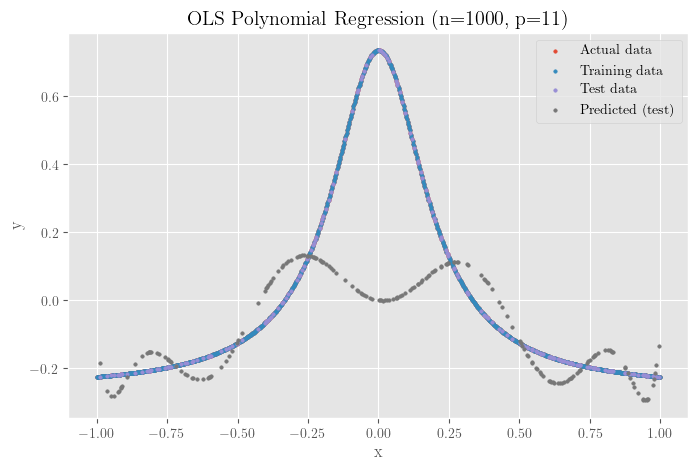

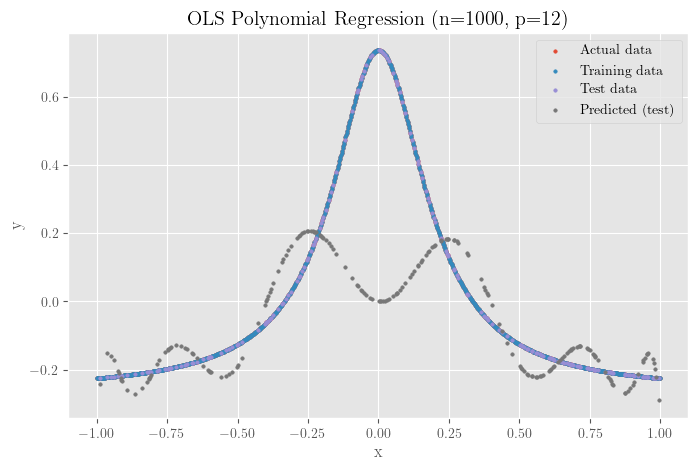

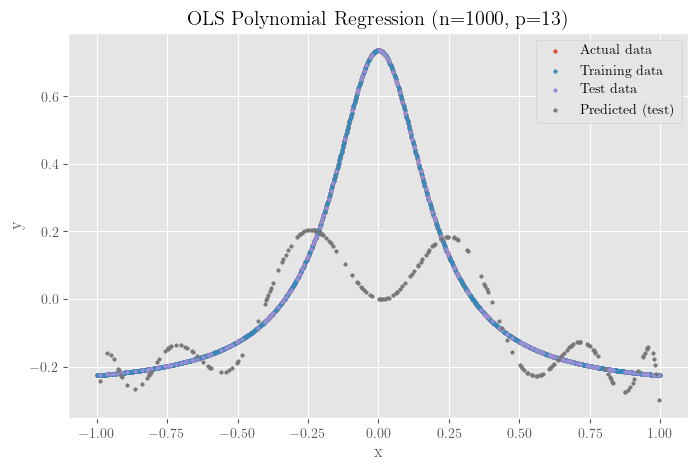

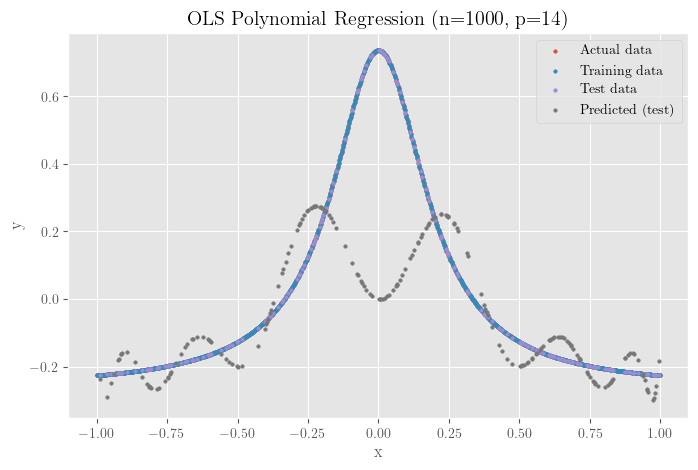

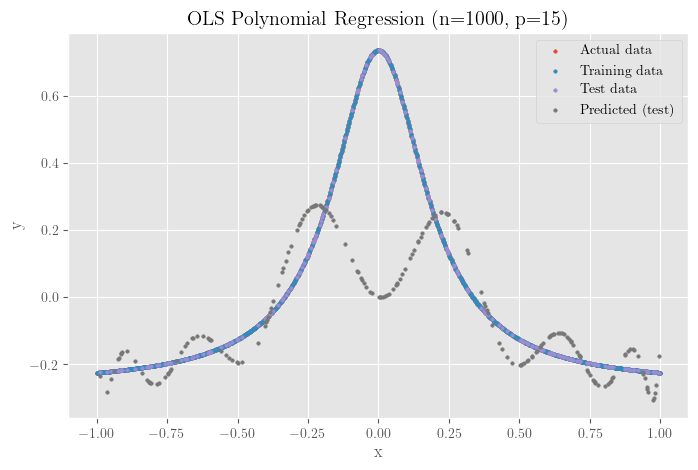

In [5]:
for p in p_vals:
    plot_OLS_results(df_OLS, n_vals[-1], p)

Text(0.5, 0.98, 'OLS')

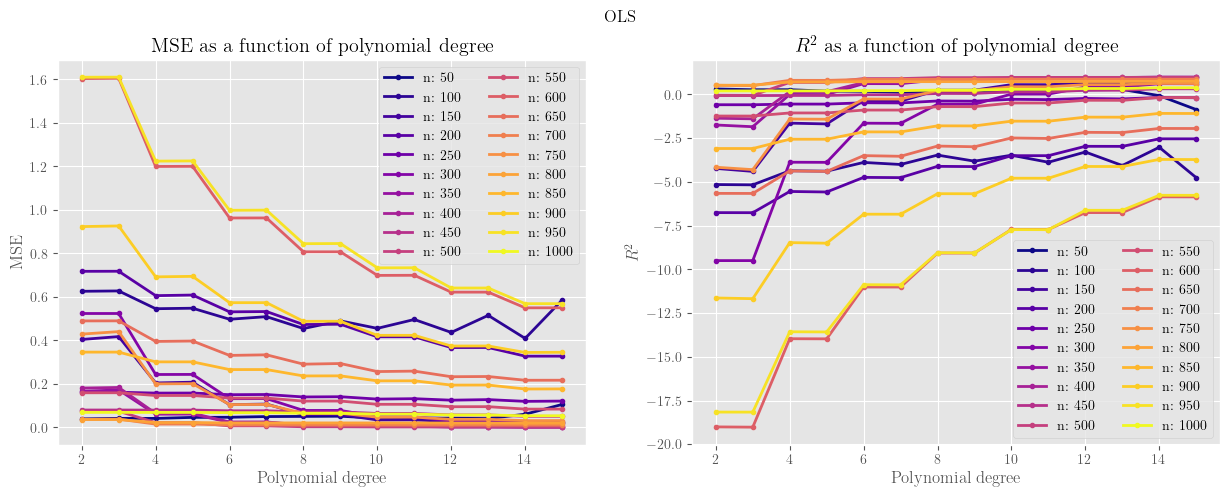

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[0].set_title('MSE as a function of polynomial degree')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[1].set_title(r'$R^2$ as a function of polynomial degree')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

Text(0.5, 0.98, 'OLS')

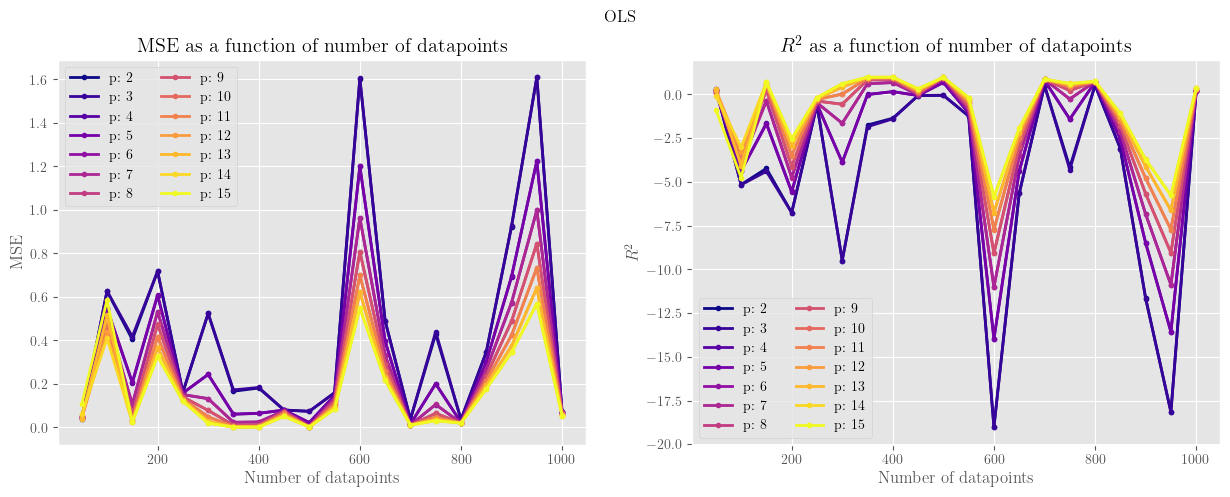

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[0].plot(p_df['n'], p_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[0].set_title('MSE as a function of number of datapoints')
ax[0].legend(loc='upper left', ncol=2)
ax[0].set_xlabel('Number of datapoints')
ax[0].set_ylabel('MSE')

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[1].plot(p_df['n'], p_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[1].set_title(r'$R^2$ as a function of number of datapoints')
ax[1].legend(loc='lower left', ncol=2)
ax[1].set_xlabel('Number of datapoints')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

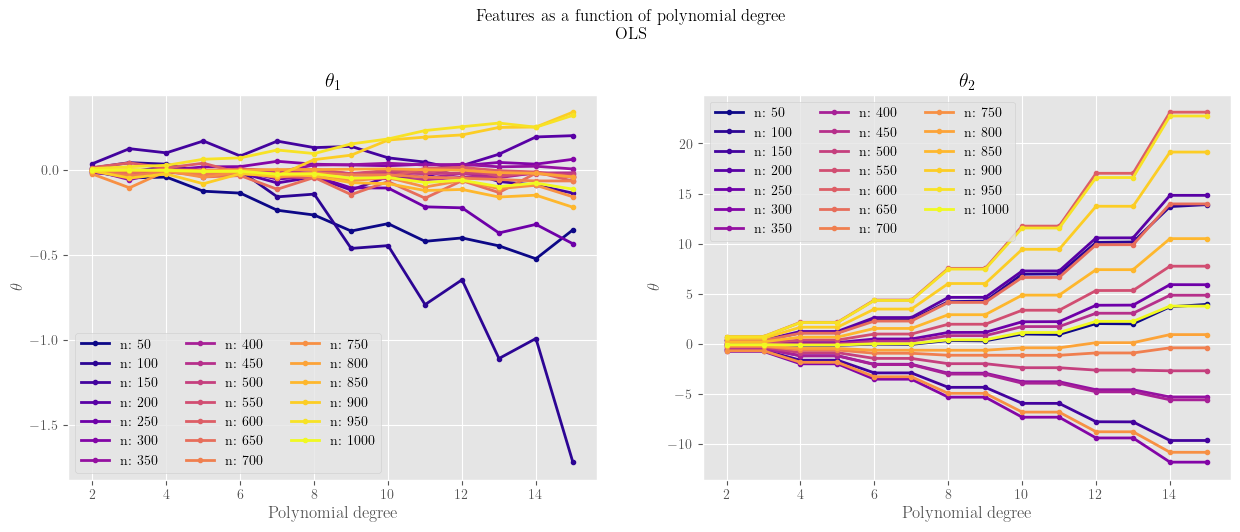

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')
    ax[1].plot(n_df['p'], n_df['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[0].set_title(r'$\theta_1$')
ax[1].set_title(r'$\theta_2$')

fig.suptitle(f'Features as a function of polynomial degree \n OLS', y=1.05)

for axs in ax:
    axs.set_xlabel('Polynomial degree')
    axs.set_ylabel(r'$\theta$')

ax[0].legend(loc='lower left', ncol=3)
ax[1].legend(loc='upper left', ncol=3)

In [9]:
df_OLS['MSE'].min()

0.0011052434278401807

# b) Ridge regression
* Using Ridge regression to predict the Runge function.
* Method is applied for the different number of data points in `n_vals` and for the different polynomial degrees in `p_vals`, and for different values of the penalization parameter $\lambda$.
* Uses sklearn functionalities to make the model and assess the MSE and R^2 score.

In [10]:
lambdas = np.logspace(-8, 2, 15)

In [11]:
df_Ridge = Ridge_results(n_vals, p_vals, lambdas)

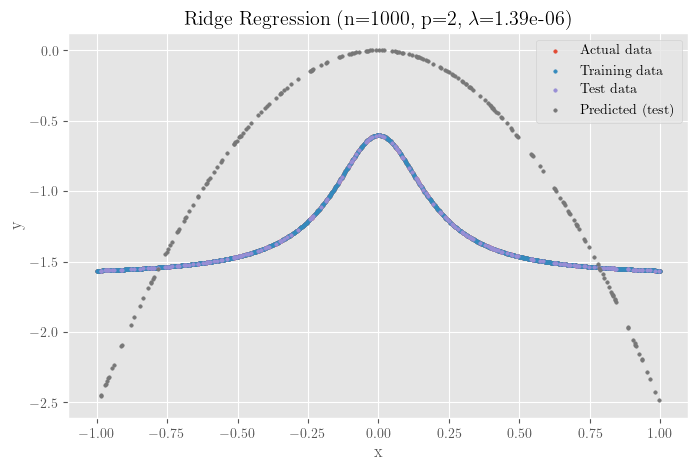

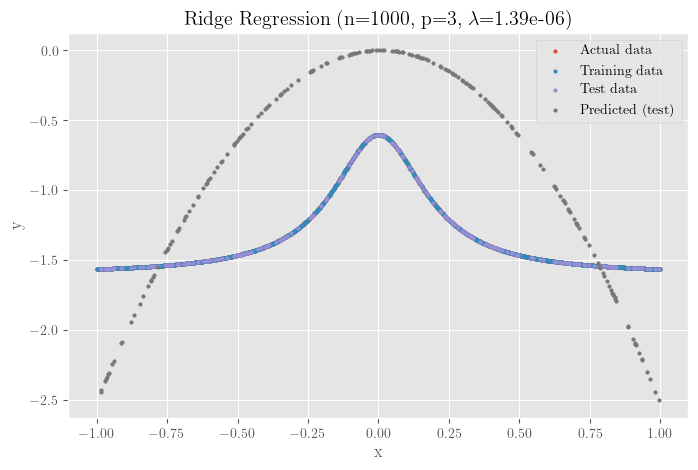

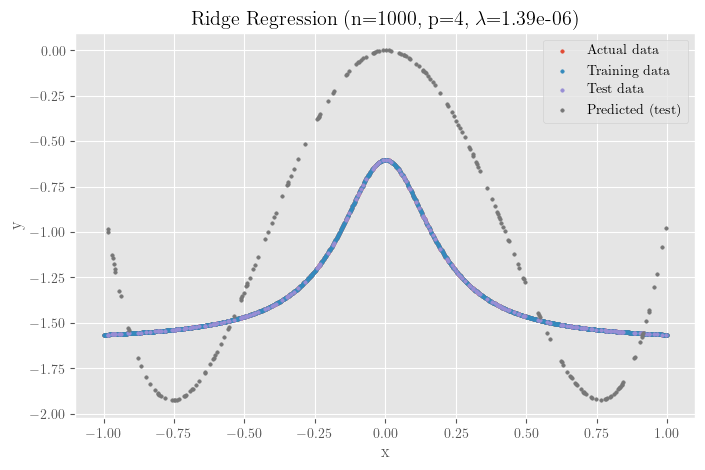

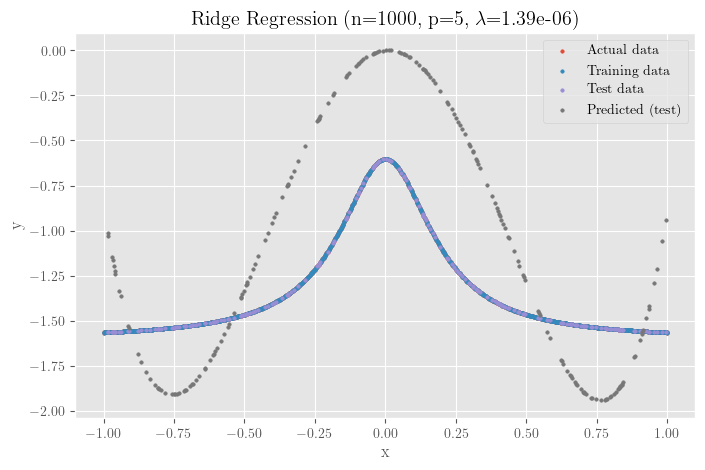

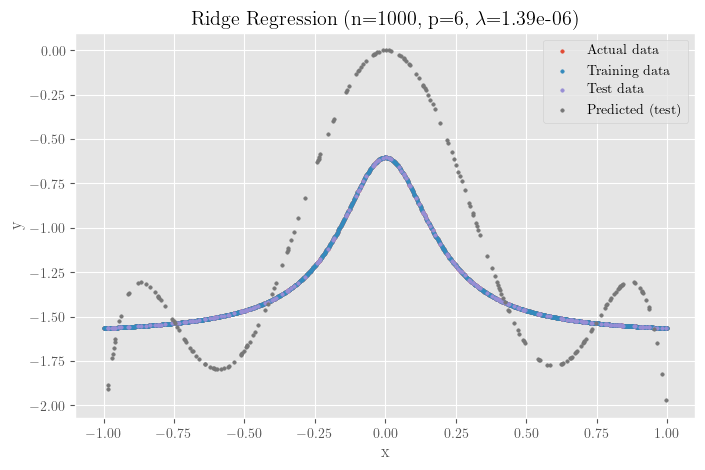

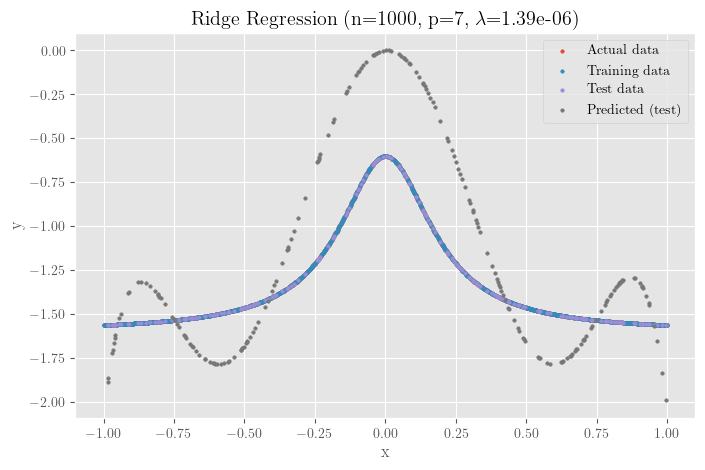

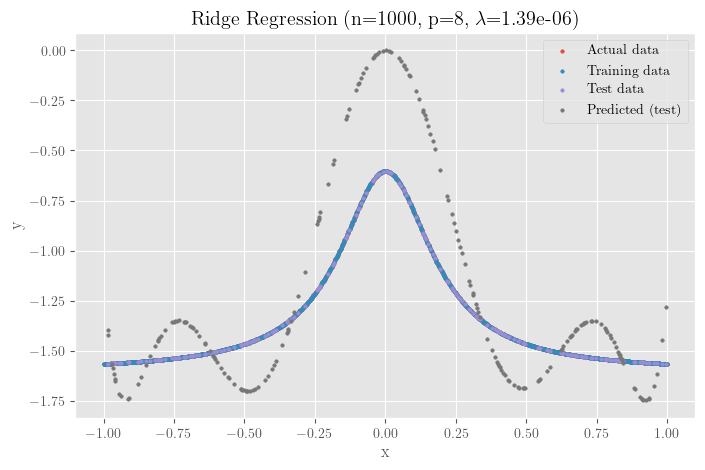

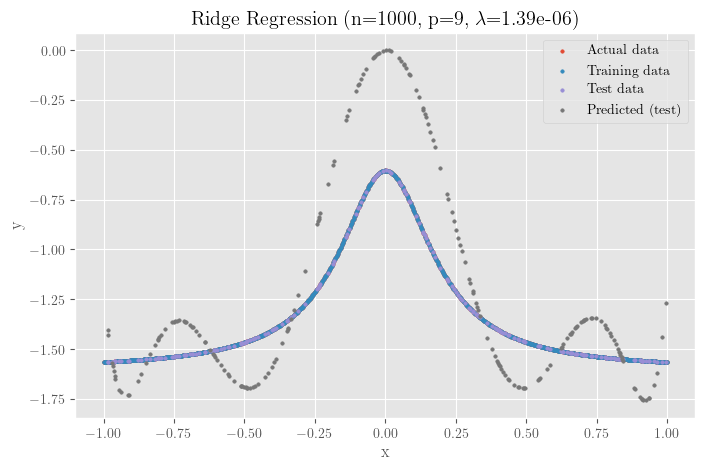

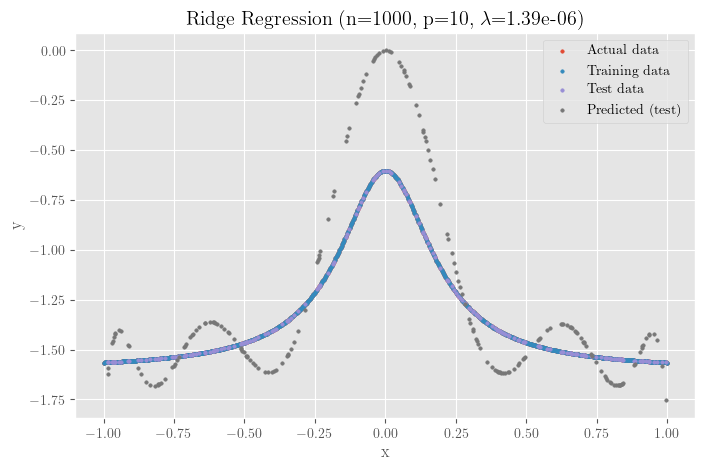

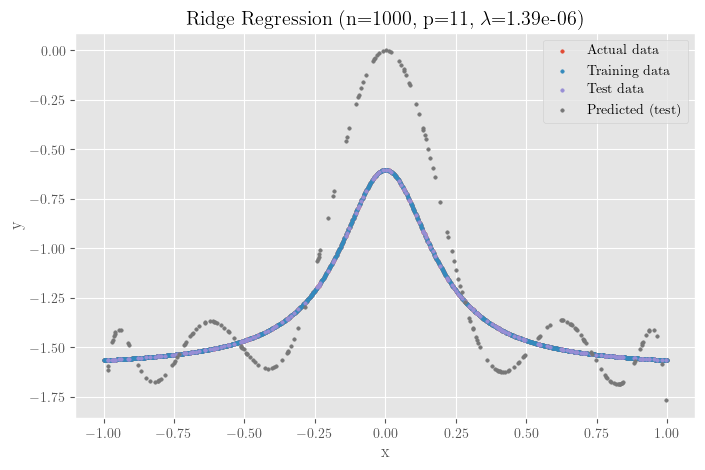

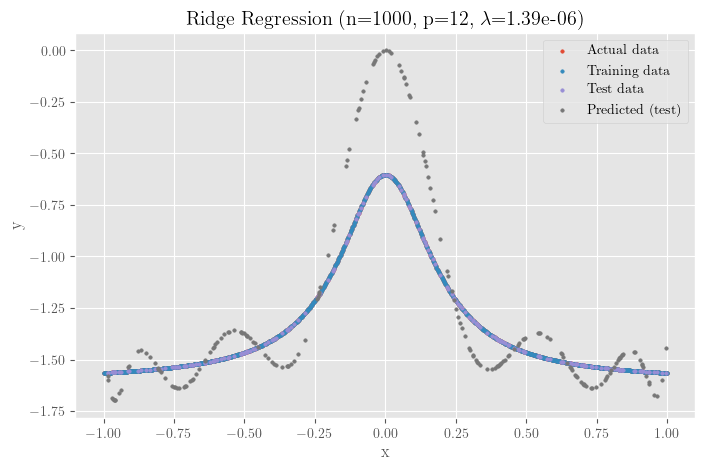

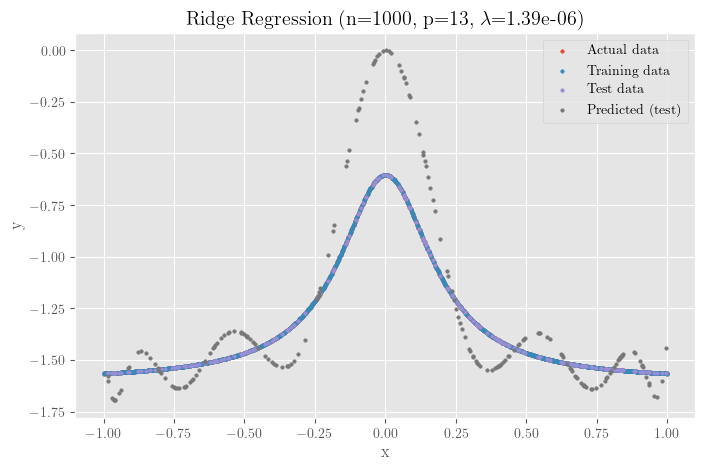

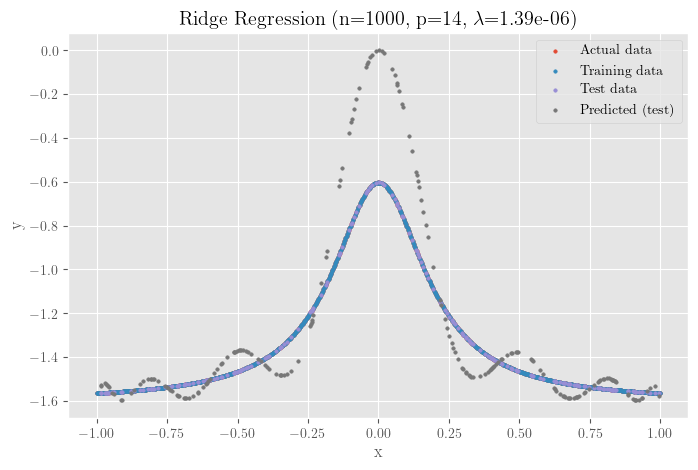

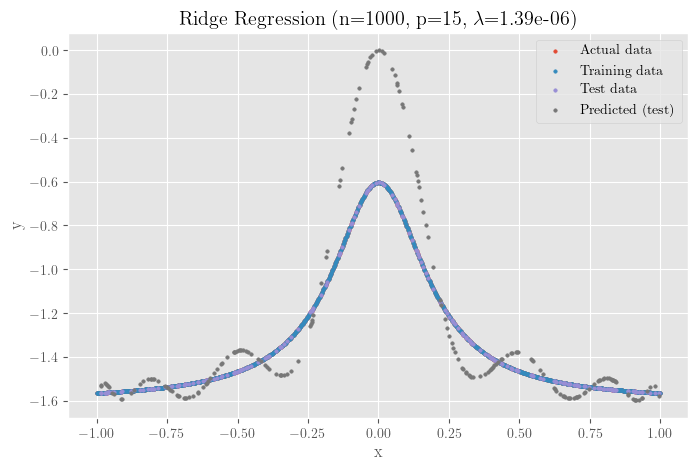

In [12]:
for p in p_vals:
    plot_Ridge_results(df_Ridge, n_vals[-1], p, lambdas[3])

Text(0.5, 0.98, 'Ridge \n Datapoints: 1000')

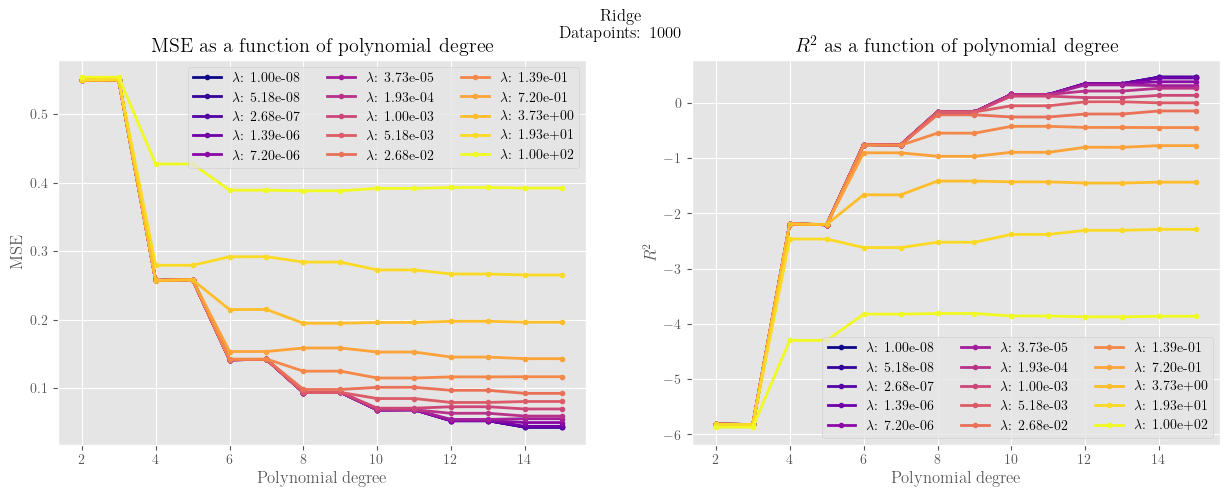

In [13]:
# Choosing a n-value to plot for
n_val = n_vals[-1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='plasma'
num_colors = len(lambdas)
cmap = plt.get_cmap(colormap, num_colors)

for i, l in enumerate(lambdas):
    n_df = df_Ridge[(df_Ridge['lambda'] == l) & (df_Ridge['n'] == n_val)]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=rf'$\lambda$: {l:.2e}')
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=rf'$\lambda$: {l:.2e}')

ax[0].set_title('MSE as a function of polynomial degree')
ax[0].legend(loc='upper right', ncol=3)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].set_title(r'$R^2$ as a function of polynomial degree')
ax[1].legend(loc='lower right', ncol=3)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'Ridge \n Datapoints: {n_val}')

Text(0.5, 0.98, 'Ridge \n Datapoints: 1000')

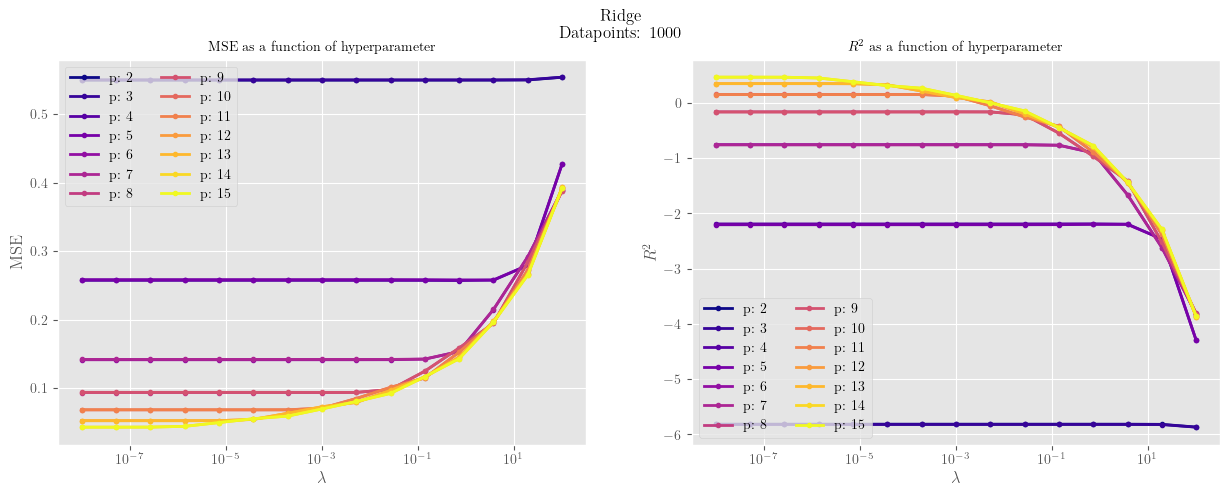

In [14]:
# Choosing a n-value to plot for
n_val = n_vals[-1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='plasma'
num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    n_df = n_df = df_Ridge[(df_Ridge['p'] == pe) & (df_Ridge['n'] == n_val)]
    color = cmap(i) 
    ax[0].plot(n_df['lambda'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe:.0f}')
    ax[1].plot(n_df['lambda'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe:.0f}')

ax[0].set_title('MSE as a function of hyperparameter', fontsize=10)
ax[0].legend(loc='upper left', ncol=2)
ax[0].set_xlabel(r'$\lambda$')
ax[0].set_ylabel('MSE')

ax[1].set_title(r'$R^2$ as a function of hyperparameter', fontsize=10)
ax[1].legend(loc='lower left', ncol=2)
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel(r'$R^2$')

ax[0].set_xscale('log')
ax[1].set_xscale('log')

fig.suptitle(f'Ridge \n Datapoints: {n_val}')

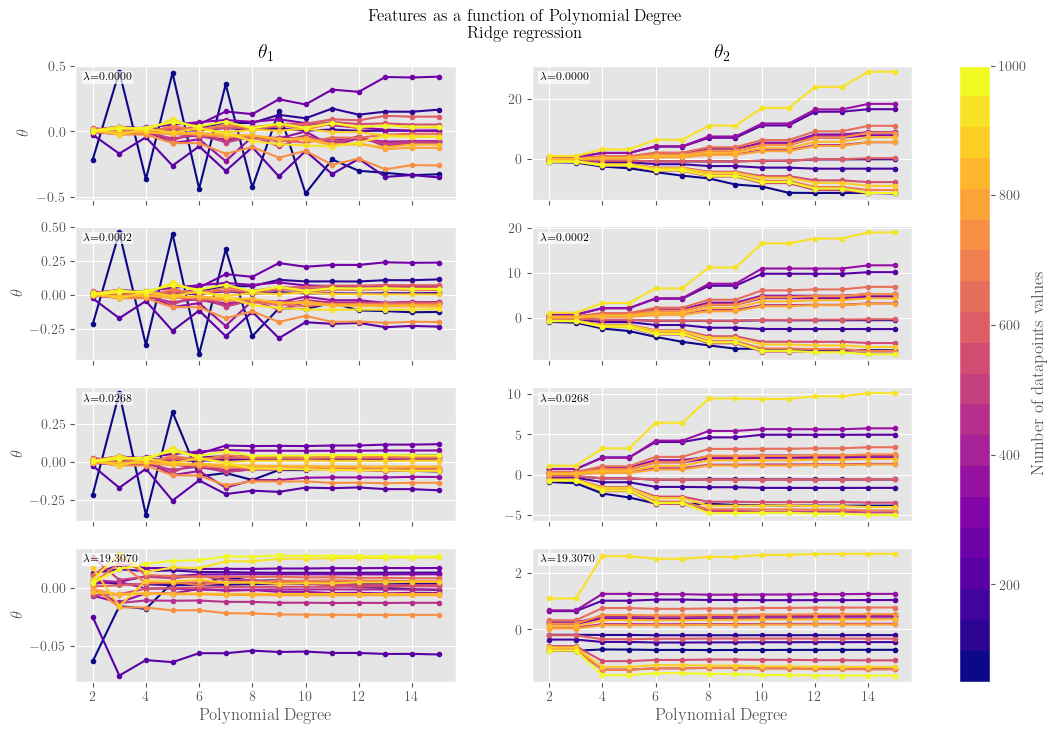

In [15]:
# Selecting specific lambda values to plot
lambda_subset = [lambdas[3], lambdas[6], lambdas[9], lambdas[13]]

fig, ax = plt.subplots(4, 2, figsize=(12, 8), sharex='col')
colormap = 'plasma'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for j, l_val in enumerate(lambda_subset):
    for i, en in enumerate(n_vals):
        n_df = df_Ridge[(df_Ridge['n'] == en) & (df_Ridge['lambda'] == l_val)]
        color = cmap(i)
        ax[j, 0].plot(
            n_df['p'], n_df['theta'].apply(lambda x: x[0]),
            marker='o', markersize=3, linewidth=1.5, color=color
        )
        ax[j, 1].plot(
            n_df['p'], n_df['theta'].apply(lambda x: x[1]),
            marker='o', markersize=3, linewidth=1.5, color=color
        )

    ax[j, 0].text(
        0.02, 0.95, rf'$\lambda$={l_val:.4f}',
        transform=ax[j, 0].transAxes,
        fontsize=8, va='top', ha='left',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
    )
    ax[j, 1].text(
        0.02, 0.95, rf'$\lambda$={l_val:.4f}',
        transform=ax[j, 1].transAxes,
        fontsize=8, va='top', ha='left',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
    )

fig.suptitle('Features as a function of Polynomial Degree \n Ridge regression', y=0.95)

for axs in ax[:, 0]:
    axs.set_ylabel(r'$\theta$')

ax[0, 0].set_title(r'$\theta_1$')
ax[0, 1].set_title(r'$\theta_2$')

ax[3, 0].set_xlabel('Polynomial Degree')
ax[3, 1].set_xlabel('Polynomial Degree')

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(n_vals), vmax=max(n_vals)))
sm.set_array([])

cbar = fig.colorbar(
    sm, ax=ax.ravel().tolist(), orientation='vertical',
    fraction=0.05, pad=0.05, location='right'
)
cbar.set_label('Number of datapoints values')

#plt.tight_layout(rect=[0, 0.05, 1, 0.96])


In [16]:
# Find the row with the minimum MSE
best_ols = df_OLS.loc[df_OLS['MSE'].idxmin()]

print("Best OLS result:")
print(f"n = {best_ols['n']}, p = {best_ols['p']}")
print(f"MSE = {best_ols['MSE']}, R2 = {best_ols['R2']}")

Best OLS result:
n = 350, p = 14
MSE = 0.0011052434278401807, R2 = 0.9817228018102114


In [17]:
# Find the row with the minimum MSE
best_ridge = df_Ridge.loc[df_Ridge['MSE'].idxmin()]

print("Best Ridge result:")
print(f"n = {best_ridge['n']}, p = {best_ridge['p']}, lambda = {best_ridge['lambda']}")
print(f"MSE = {best_ridge['MSE']}, R2 = {best_ridge['R2']}")

Best Ridge result:
n = 150, p = 14, lambda = 5.1794746792312124e-08
MSE = 0.00034901331663512585, R2 = 0.9942998689275012
